In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [15]:
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering

In [19]:
from sklearn.cluster import KMeans
from src2.utils import *

In [11]:
def add_labels(x_list, y_list, labels):
    for x,y,label in zip(x_list, y_list, labels):
        plt.text(x+0.25, y-0.25, label)

In [2]:
df=pd.read_csv("./sensor.csv")
df["Timestamp"] = pd.to_datetime(df["timestamp"])
df_gb = df.groupby(pd.Grouper(key="Timestamp", axis=0, freq="D")).mean()
df_gb.reset_index(inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

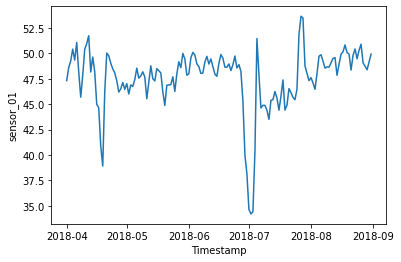

In [3]:
sns.lineplot(x="Timestamp", y="sensor_01", data=df_gb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

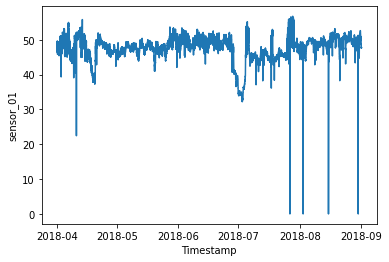

In [4]:
sns.lineplot(x="Timestamp", y="sensor_01", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

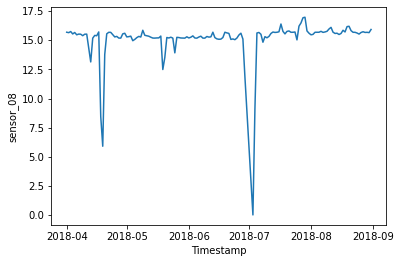

In [5]:
sns.lineplot(x="Timestamp", y="sensor_08", data=df_gb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

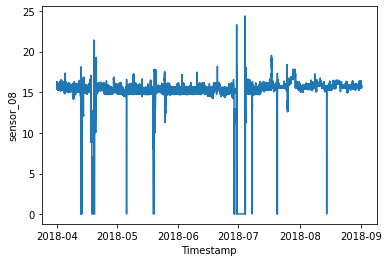

In [6]:
sns.lineplot(x="Timestamp", y="sensor_08", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

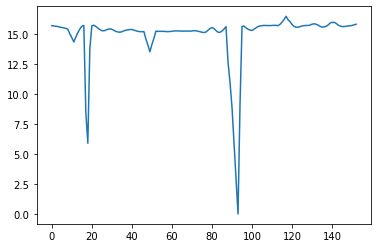

In [8]:
x8=pd.to_numeric(df_gb.index)
y8=pd.to_numeric(df_gb.sensor_08)
result8 = lowess(y8, x8, frac=0.05, it=3, delta=0.0)
ar8 =[]
for i in range(len(result8[0])):
    b =[]
    for j in range(len(result8)):
        b.append(result8[j][i])
    ar8.append(b)
sns.lineplot(x=ar8[0], y=ar8[1])
plt.show

In [ ]:
# Table of distance

In [10]:
tab_dis8 = []
for i in range(len(ar8[0])):
    tab_dis8.append([])
for i in range(len(ar8[0])):    
    for j in range(len(ar8[1])):
        tab_dis8[i].append([])
for i in range(len(ar8[0])):
    for j in range(len(ar8[1])):
        tab_dis8[i][j] = abs(ar8[1][i] - ar8[1][j] )
df_dist8 = pd.DataFrame(tab_dis8)
df_dist8

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0.000000,0.022099,0.046242,0.068917,0.119625,0.150154,0.185742,0.225141,0.291134,0.677207,...,0.055582,0.030789,0.071418,0.071046,0.051974,0.023103,0.010801,0.023241,0.069943,0.120565
1,0.022099,0.000000,0.024142,0.046818,0.097526,0.128055,0.163643,0.203041,0.269034,0.655107,...,0.077682,0.008690,0.049318,0.048946,0.029875,0.001004,0.011299,0.045341,0.092042,0.142664
2,0.046242,0.024142,0.000000,0.022675,0.073384,0.103912,0.139501,0.178899,0.244892,0.630965,...,0.101824,0.015453,0.025176,0.024804,0.005733,0.023139,0.035441,0.069483,0.116185,0.166807
3,0.068917,0.046818,0.022675,0.000000,0.050708,0.081237,0.116825,0.156223,0.222217,0.608289,...,0.124499,0.038128,0.002500,0.002129,0.016943,0.045814,0.058117,0.092159,0.138860,0.189482
4,0.119625,0.097526,0.073384,0.050708,0.000000,0.030529,0.066117,0.105515,0.171508,0.557581,...,0.175208,0.088836,0.048208,0.048580,0.067651,0.096522,0.108825,0.142867,0.189568,0.240191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.023103,0.001004,0.023139,0.045814,0.096522,0.127051,0.162639,0.202037,0.268031,0.654103,...,0.078685,0.007686,0.048314,0.047943,0.028871,0.000000,0.012303,0.046344,0.093046,0.143668
147,0.010801,0.011299,0.035441,0.058117,0.108825,0.139353,0.174942,0.214340,0.280333,0.666406,...,0.066383,0.019989,0.060617,0.060245,0.041174,0.012303,0.000000,0.034042,0.080744,0.131366
148,0.023241,0.045341,0.069483,0.092159,0.142867,0.173395,0.208984,0.248382,0.314375,0.700448,...,0.032341,0.054031,0.094659,0.094287,0.075216,0.046344,0.034042,0.000000,0.046702,0.097324
149,0.069943,0.092042,0.116185,0.138860,0.189568,0.220097,0.255685,0.295084,0.361077,0.747150,...,0.014361,0.100732,0.141361,0.140989,0.121917,0.093046,0.080744,0.046702,0.000000,0.050622


In [ ]:
# AFTD

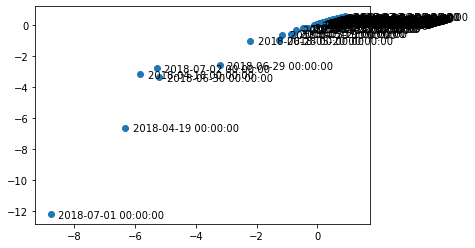

In [14]:
aftd = MDS(n_components=2, dissimilarity='precomputed')
dist = aftd.fit_transform(df_dist8)
plt.scatter(*dist.T)
add_labels(dist[:, 0], dist[:, 1], df_gb.Timestamp)
plt.show()

In [ ]:
# clustering 5 groupes 

C:\Users\corri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


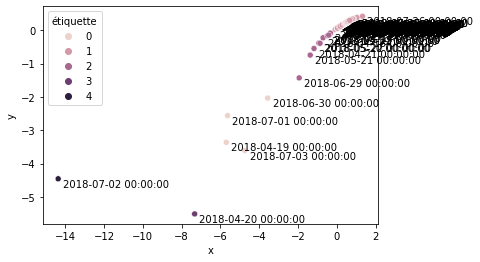

In [16]:
model = AgglomerativeClustering(affinity="precomputed", linkage="complete", n_clusters=5).fit(df_dist8)
labels = model.labels_
aftd = MDS(n_components=2, dissimilarity="precomputed")
dist = aftd.fit_transform(df_dist8)
df = pd.DataFrame({"x": dist[:, 0], "y": dist[:, 1], "étiquette": labels})
sns.scatterplot("x", "y", hue="étiquette", data=df)
add_labels(dist[:, 0], dist[:, 1], df_gb["Timestamp"][1:-1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

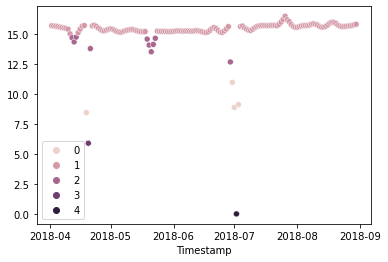

In [17]:
sns.scatterplot(x= df_gb["Timestamp"][1:-1], y=ar8[1],hue=labels)
plt.show

In [ ]:
# clustering 3 groupes 

<function matplotlib.pyplot.show(close=None, block=None)>

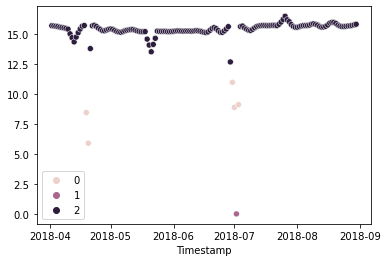

In [18]:
model = AgglomerativeClustering(affinity="precomputed", linkage="complete", n_clusters=3).fit(df_dist8)
labels = model.labels_
aftd = MDS(n_components=2, dissimilarity="precomputed")
dist = aftd.fit_transform(df_dist8)
df = pd.DataFrame({"x": dist[:, 0], "y": dist[:, 1], "étiquette": labels})
sns.scatterplot(x= df_gb["Timestamp"][1:-1], y=ar8[1],hue=labels)
plt.show

In [ ]:
# K-Means

In [ ]:
#clustering 3 groupes

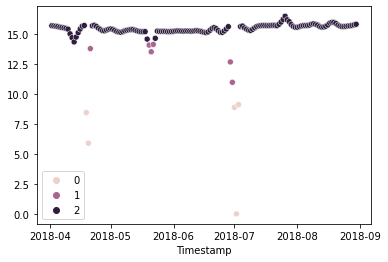

In [21]:
cls = KMeans(n_clusters=3, init="random")
cls.fit(df_dist8)
labels_k = pd.Series(cls.labels_, name="K-means")
list_labels_k = labels_k.to_list()
sns.scatterplot(x = df_gb["Timestamp"][1:-1], y=ar8[1], hue=list_labels_k)
plt.show()